In [ ]:
import os, cv2

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow.keras.applications.mobilenet import MobileNet

In [ ]:
!unzip Bag.zip

In [ ]:
f_path = '/content/Bag'

In [ ]:
def img_process(f_path):
    data = []
    IMG_SIZE = 224
    categories = ["Garbage", "Paper","Plastic"]
    for category in categories:
        path_link = os.path.join(f_path, category)
        label = categories.index(category)
        # print(label)
        for image in os.listdir(path_link):
            try:
                img_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, label])
            except Exception as e:
                print(e)
    # print(data)
    return data

In [ ]:
x = []
y = []
integrate = img_process(f_path)
for feature, label in np.array(integrate):
    x.append(feature)
    y.append(label)
X = np.array(x)
X = X.reshape(-1, 224, 224, 3)

label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
Y = np.array(y)

# TRAIN_SPLIT =  int(0.6 * len(X))

# TEST_SPLIT = int(0.15 * len(X)+TRAIN_SPLIT)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, random_state=42, test_size=0.2)
# X_train, X_test, X_validate = np.split(X, [TRAIN_SPLIT, TEST_SPLIT])
# Y_train, Y_test, Y_validate = np.split(Y, [TRAIN_SPLIT, TEST_SPLIT])
print('x and y are: ')

print(len(X_validate),len(X_test))



x and y are: 
121 152


<ipython-input-65-5fc8f48ded1d>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for feature, label in np.array(integrate):


In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
val_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), Y_train, shuffle=True)
val_generator = test_generator.flow(np.array(X_validate), Y_validate, shuffle=True)
test_generator = test_generator.flow(np.array(X_test), Y_test, shuffle=False)


In [ ]:
X_train.shape[1:]

(224, 224, 3)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
INPUT_SHAPE = X_train.shape[1:]

base_model = tf.keras.applications.MobileNet(
    input_shape = INPUT_SHAPE,
    weights = 'imagenet',
    include_top=False,
    alpha = 0.25
)

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

In [ ]:
#@title 默认标题文本


learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
num_epochs = [10, 20, 30]

def mbv1(learning_rate, batch_size, num_epochs,train_generator,test_generator):
  model = Model(inputs=base_model.input, outputs=x)

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

  history = model.fit(train_generator, batch_size = batch_size,epochs = num_epochs, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))
  scores = model.evaluate(test_generator)

  return scores[1] 

best_accuracy = 0.0
for lr in learning_rates:
    for bs in batch_sizes:
        for ne in num_epochs:
            accuracy = m(lr,bs,ne,train_generator,test_generator)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_lr = lr
                best_bs = bs
                best_ne = ne
# Print the optimal hyperparameters
print('Optimal learning rate: {:.4f}'.format(best_lr))
print('Optimal batch size: {}'.format(best_bs))
print('Optimal number of epochs: {}'.format(best_ne))
  
  # return the validation accuracy
# scores = model.evaluate(validation_data)

# model.summary()
# model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D(2, 2))

# model.add(Flatten())
# model.add(Dropout(0.25))

# model.add(Dense(64, activation="relu"))
# model.add(Dense(3, activation="softmax"))



# model.summary()

# model.add(InputLayer(input_shape=(96, 96, 3), name='x_input'))
# # Don't include the base model's top layers
# last_layer_index = -5
# model.add(Model(inputs=base_model.inputs, outputs=base_model.layers[last_layer_index].output))
# model.add(Reshape((-1, model.layers[-1].output.shape[3])))
# model.add(Dropout(0.1))
# model.add(Flatten()(base_model.output))
# model.add(Dense(3, activation='softmax'))

# model.summary()

In [ ]:

best_accuracy = 0.0
for lr in learning_rates:
    for bs in batch_sizes:
        for ne in num_epochs:
            accuracy = m(lr,bs,ne,train_generator,test_generator)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_lr = lr
                best_bs = bs
                best_ne = ne
# Print the optimal hyperparameters
print('Optimal learning rate: {:.4f}'.format(best_lr))
print('Optimal batch size: {}'.format(best_bs))
print('Optimal number of epochs: {}'.format(best_ne))
                



Epoch 1/10
11/11 [==============================] - 22s 365ms/step - loss: 7.8183 - accuracy: 0.4273 - val_loss: 2.0557 - val_accuracy: 0.5529
Epoch 2/10
11/11 [==============================] - 4s 334ms/step - loss: 0.9702 - accuracy: 0.7982 - val_loss: 0.8268 - val_accuracy: 0.7176
Epoch 3/10
11/11 [==============================] - 4s 331ms/step - loss: 0.3328 - accuracy: 0.9080 - val_loss: 0.7480 - val_accuracy: 0.6824
Epoch 4/10
11/11 [==============================] - 5s 429ms/step - loss: 0.1569 - accuracy: 0.9525 - val_loss: 0.3539 - val_accuracy: 0.8824
Epoch 5/10
11/11 [==============================] - 4s 344ms/step - loss: 0.0853 - accuracy: 0.9733 - val_loss: 0.3689 - val_accuracy: 0.9176
Epoch 6/10
11/11 [==============================] - 4s 385ms/step - loss: 0.1205 - accuracy: 0.9733 - val_loss: 0.3544 - val_accuracy: 0.8824
Epoch 7/10
11/11 [==============================] - 4s 331ms/step - loss: 0.0729 - accuracy: 0.9852 - val_loss: 0.4071 - val_accuracy: 0.9294
Epoch

In [ ]:
best_model = Model(inputs=base_model.input, outputs=x)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

best_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

history = best_model.fit(train_generator, batch_size = 10,epochs = 20, validation_data=val_generator, shuffle=True, validation_steps=len(val_generator))


Epoch 1/20
16/16 [==============================] - 21s 362ms/step - loss: 5.8863 - accuracy: 0.4596 - val_loss: 0.6326 - val_accuracy: 0.7273
Epoch 2/20
16/16 [==============================] - 6s 352ms/step - loss: 0.8538 - accuracy: 0.7702 - val_loss: 0.2289 - val_accuracy: 0.8843
Epoch 3/20
16/16 [==============================] - 5s 307ms/step - loss: 0.2791 - accuracy: 0.9006 - val_loss: 0.7402 - val_accuracy: 0.7686
Epoch 4/20
16/16 [==============================] - 6s 354ms/step - loss: 0.1937 - accuracy: 0.9317 - val_loss: 0.5057 - val_accuracy: 0.8430
Epoch 5/20
16/16 [==============================] - 5s 307ms/step - loss: 0.1556 - accuracy: 0.9607 - val_loss: 0.5290 - val_accuracy: 0.8678
Epoch 6/20
16/16 [==============================] - 5s 327ms/step - loss: 0.1332 - accuracy: 0.9565 - val_loss: 0.4375 - val_accuracy: 0.8678
Epoch 7/20
16/16 [==============================] - 5s 309ms/step - loss: 0.1318 - accuracy: 0.9545 - val_loss: 0.2552 - val_accuracy: 0.9421
Epoch

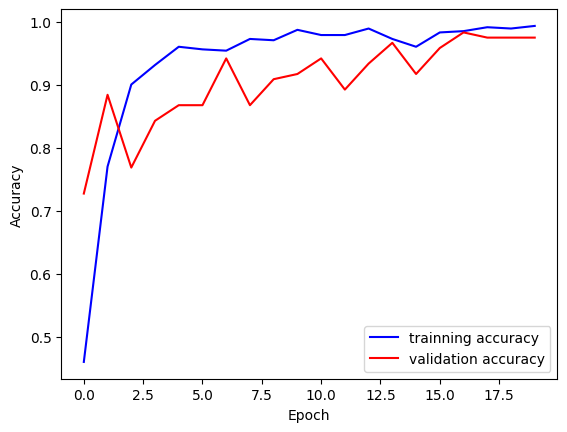

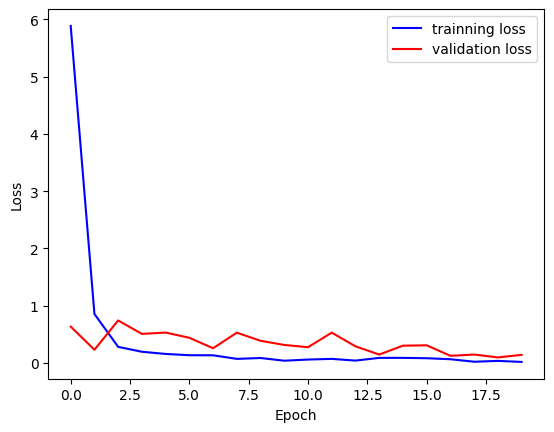

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
best_model.save("bag.model")

In [ ]:
results = best_model.evaluate(test_generator, verbose=0)
print(results)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

[0.20017938315868378, 0.9605262875556946]
    Test Loss: 0.20018
Test Accuracy: 96.05%


In [ ]:
prediction = best_model.predict(test_generator)
np.argmax(prediction,axis=1)

5/5 [==============================] - 1s 24ms/step


array([1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2,
       0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2])

In [ ]:
labels_new = ["Garbage", "Paper","Plastic"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(prediction,axis=1), target_names=labels_new))

              precision    recall  f1-score   support

     Garbage       0.98      0.96      0.97        50
       Paper       0.96      0.95      0.96        58
     Plastic       0.93      0.98      0.96        44

    accuracy                           0.96       152
   macro avg       0.96      0.96      0.96       152
weighted avg       0.96      0.96      0.96       152



In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
    
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

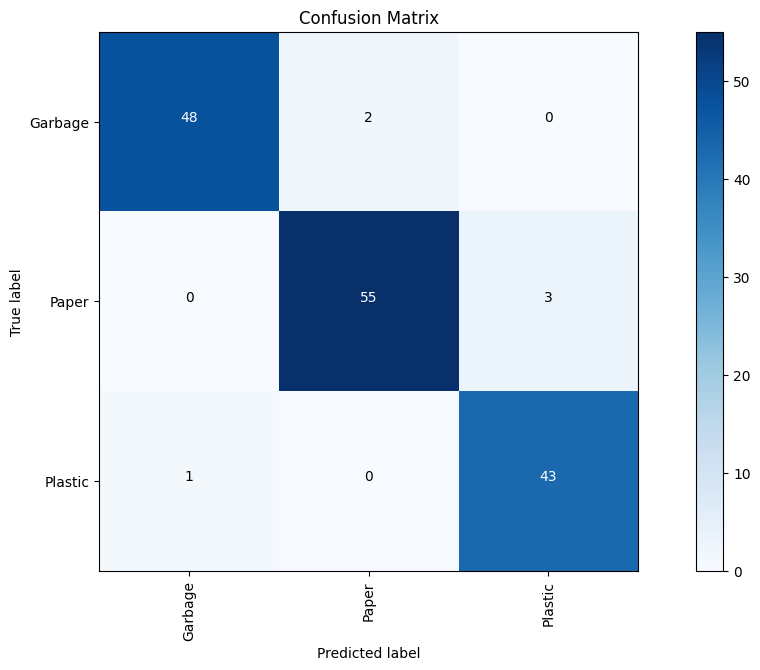

In [ ]:
from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
make_confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(prediction,axis=1), list(labels_new))
# plot_confusion_matrix(np.argmax(Y_test, axis=1),np.argmax(prediction,axis=1),best_model)

In [ ]:
labels_new = ["Garbage", "Paper","Plastic"]
IMG_SIZE = 224
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./bag.model")

In [ ]:
prediction = model.predict([prepare("/content/Bag/Plastic/00000250.jpg")])
np.argmax(prediction)

prediction

1/1 [==============================] - 1s 1s/step


array([[0.03633946, 0.06024047, 0.9034201 ]], dtype=float32)

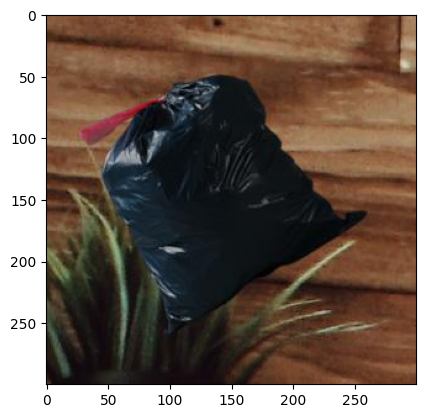

In [ ]:
plt.imshow(plt.imread("/content/Bag/Garbage/00000026.jpg"))

1/1 [==============================] - 0s 23ms/step
This is Garbage Bag with confidence of 0.9999964


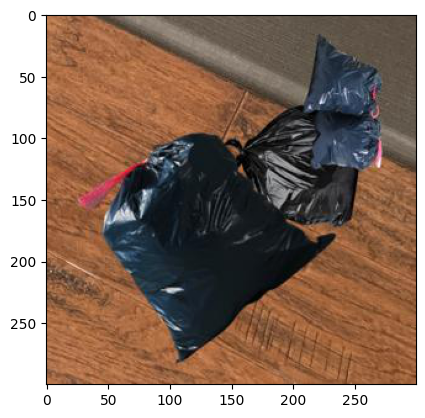

In [ ]:
prediction = model.predict([prepare("/content/Bag/Garbage/00000213.jpg")])
plt.imshow(plt.imread("/content/Bag/Garbage/00000213.jpg"))
np.argmax(prediction)

print("This is "+labels_new[np.argmax(prediction)]+' Bag with confidence of '+str(prediction[0][np.argmax(prediction)]))
# for i in prediction:
#   for j in i:
#     print(float(j))
